# Central Limit Theorem in Action and Drill (see bellow)
### Iryna Yavorska
Let's spin up so me population data and give this a try. We'll make two variables to represent two different populations: one binomially distributed variable with p of 0.2, n=10, and 10,000 datapoints (group1) and another binomially distributed variable with p of 0.5, n=10 and 10,000 datapoints (group2). The true population difference between the two populations is 0.3.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

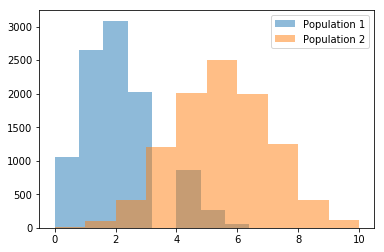

In [2]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

#make histograms for the two groups.

plt.hist(pop1, alpha=0.5, label='Population 1')
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.legend(loc='upper right')
plt.show()

The populations are not normal. Next, take a sample of 100 from each population and plot them.

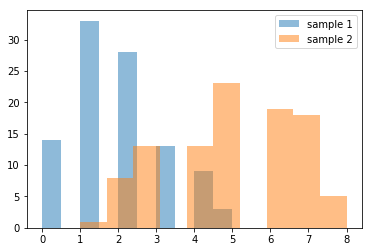

In [3]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

Next, compute the means and standard deviations for each group. Note that the mean represents n * p: the probability of an event occuring (p) mulitplied by the number of repetitions (n). To get p for each sample, divide by n, which we set to 10 when generating the populations.

In [4]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

#Compute the difference between the two sample means.
diff=sample2.mean() - sample1.mean()
print(diff)

1.79
5.03
1.2672410978184063
1.699735273505848
3.24


Next calculate the standard error of sampling distribution of the difference of the means. First, create an array with the size of each variable and another with the standard deviation of each variable. In this case, the sizes are already known since you privided them eariler, but let's calculate them anyway.

In [5]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

#The squared standard deviations are divided by the sample size and summed,
#then we take the square root of the sum.
diff_se = (sum(sd ** 2 / size)) ** 0.5

#The difference between the means divided by the standard error: T-value.
print(diff/diff_se)

15.281998832625137


Finally, we import the fuction ttest_ind from scipy.stats, whic calculates the t-value for us (called "statistic") and also provides the probabilty calculation (called "pvalue"). The t-value we calculated and the t-value give by the functions may differ slightly after the hundredth decimal place. This is due to the differences of rounding caused by our multiple-step approach to calculation the t-value.

In [6]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.20539685234004, pvalue=2.6884830174963563e-34)


The t-value scales the difference between the two groups by the amount of variance in the two samples. High variability in samples can lead to groups with means that look different, but when we look at the histogram we see that most of the values in the sample gruoups overlap. The groups are so variable that the distribution of values is quiet broad. For example, Olympic races are split into men's races and women's races because men, are on average, faster then women. However, looking at the distribution of running speed in the [NY marathon](http://www.warandgender.com/wggendif.htm), where women and men run together, it's clear that the running speed has a high degree of variability, and that the distributions for me and women overlap a great deal.

One way to interpret a t-value is as the number of standard errors worth of space separating the group means. A t-value of 2 would indicate that the means are two standard errors apart.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different. The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations. The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.

# Drill - Exploring the Central Limit Theorem

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

## First we increase the size of the sample from 100 to 1000

1.96
4.95
1.2354756169184402
1.5618898808814916
2.99


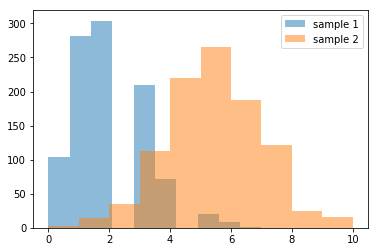

In [7]:
#Increase the size of your samples from 100 to 1000, 
#then calculate the means and standard deviations for your new samples 
#and create histograms for each.

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean() - sample1.mean()
print(diff)

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

## Decreased sample size to 20

2.9
5.05
1.6401219466856725
1.2031209415515967
2.15


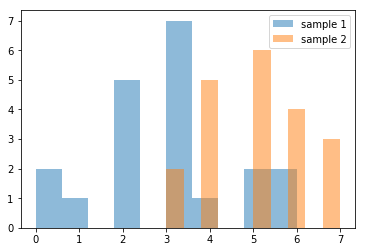

In [8]:
#Decreasing the size of samples to 20.

sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean() - sample1.mean()
print(diff)

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

### Q1. What values change, and what remain the same?

A: My prediction is that as sample size changes we will see variation in both mean and standard deviation. Increasing the sample size, from 100 to 1000 resulted in slight change in means from pop1=2.09 and pop2=5.12, to decreased values in a larger sample with mean in pop1=2.055 and pop2=4.967. 

Greater difference can be observed in the decreasing standard deviation, which decreases with the changing sample size:

For example bringing sample size down to 20 produced lower standard deviation values for pop1=0.98 and for pop2=1.04, compared to the starting values for standard deviation of pop1=1.3 and pop2=3.0.

Both mean and standard deviation decrease if sample size increases or decreases, with greatest variation in the standard deviation values.

## Next I will change pop1 p value to 0.3

3.03
5.19
1.4103545653487284
1.7011466721009096
2.1600000000000006
Ttest_indResult(statistic=9.725859384862312, pvalue=2.0161084093338874e-18)


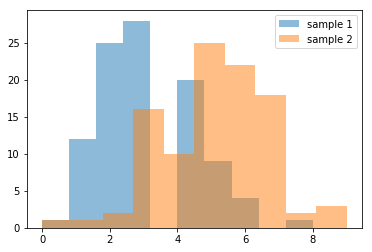

In [9]:
#Change the probability value (p in the NumPy documentation) for pop1 to 0.3, 
#then take new samples and compute the t-statistic and p-value.

pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean() - sample1.mean()
print(diff)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

## And changing pop1 p value to 0.4

4.34
4.94
1.6076069171286869
1.8805318396666406
0.6000000000000005
Ttest_indResult(statistic=2.4130412896563143, pvalue=0.01675344687562341)


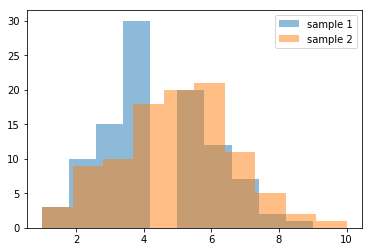

In [10]:
#Then change the probability value p for group 1 to 0.4, and do it again.

pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean() - sample1.mean()
print(diff)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

### Q2. What changes, and why?
A: As we we increase p value for pop1, our samples form pop1 and pop2 are becoming more similar, this would increase p values and as a result decrease t-values that compare the variability. Based on the values summarized above, t-value is decreasing, while p-value is increasing. 

For pop1 p=0.2, t-value=*13.55* and p-value=$$2.55*e^-29$$

For pop1 p=0.3, t-value=*9.82* and p-value=$$8.91*e^-19$$

For pop1 p=0.4, t-value=*3.54* an p-value=$$0.0005$$

By increasing the p value in pop1, samples are becoming increasingly simillar, resulting in lower t-values and high p-values.

10.019424505837128
9.949635324318292
0.7183355683300262
0.9242613628979754
-0.06978918151883562
Ttest_indResult(statistic=-1.8843803109049964, pvalue=0.05966744670031962)


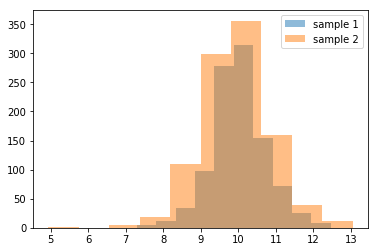

In [11]:
#Change the distribution of your populations from binomial to a distribution of your choice.
#I chose np.random.logistic with population sample size of 1000 and pop1 p value of 0.4:

pop1 = np.random.logistic(10, 0.4, 10000)
pop2 = np.random.logistic(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

diff=sample2.mean() - sample1.mean()
print(diff)

from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

### Q3. Do the sample mean values still accurately represent the population values?
A: Yes, Central limit theorem shows that normal distributions can still be used to analyze samples of data from non-noramlly distributed populations. When sampling from a population of any distribution, as the sample size gets larger, the sample means tend to follow normal probability distribution.

The more non-normal the population, the larger the samples need to be - statistics can be calculated and population parameters estimated even when the distribution of a population is unknown.
In other words, if we use a sample size large enough, any distribution can be analyzed statistically and give insight as to the mean values of the population.